The goal is to predict whether a customer will change telecommunications provider. This is known as "churning".

Customer churn is also known as customer attrition

## Basic EDA

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split

In [2]:
# Read in the datse
data = pd.read_csv('data/train.csv')
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
data.shape

(4250, 20)

In [4]:
# data.info()

In [5]:
from functions import missing_data

In [6]:
# Get percent of missign data
missing = missing_data(data, show_all=True)
missing

,Total,Percent,Types
state,0,0.0,object
account_length,0,0.0,int64
area_code,0,0.0,object
international_plan,0,0.0,object
voice_mail_plan,0,0.0,object
number_vmail_messages,0,0.0,int64
total_day_minutes,0,0.0,float64
total_day_calls,0,0.0,int64
total_day_charge,0,0.0,float64
total_eve_minutes,0,0.0,float64


Obs: There are no missing features in the dataset

In [7]:
# Split the data into train and test set
train, test_df = train_test_split(data, test_size=0.20, stratify=data['churn'], random_state=42)

In [8]:
# Split the train data into train and validation set
train_df, val_df = train_test_split(train, test_size=0.25, stratify=train['churn'], random_state=42)

In [9]:
train_df.shape, val_df.shape, test_df.shape

((2550, 20), (850, 20), (850, 20))

In [10]:
# train_df.head()

In [11]:
from functions import find_constant_columns

In [12]:
# check for columns that contain constant values
find_constant_columns(train_df)

[]

In [13]:
from functions import get_highly_imbalanced_columns

In [14]:
# Colums that have more than 95% of one value
imbs = get_highly_imbalanced_columns(train_df, 0.95)
imbs, len(imbs)

([], 0)

Obs. There are no highly imbalanced columns in the dataset

In [15]:
# Check the columns in train_df
train_df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [16]:
# How many numeric and categorial values do we have in the dataset
train_df.dtypes.value_counts()

float64    8
int64      7
object     5
Name: count, dtype: int64

## Univariate Analysis

The goal is to examine each feature in order to
+ Check for inconsistent entries
+ need for outlier removal

In [17]:
# Split the data into numeric and categoricals for exploration purposes
num_df = train_df.select_dtypes(include=['number'])

cat_df = train_df.select_dtypes(include=['object'])
# Fill the missing values in cat_df with 'missing' for the purpose of recognizing it
cat_df = cat_df.fillna('missing')

num_df.shape, cat_df.shape

((2550, 15), (2550, 5))

### Categoricals

In [18]:
cat_df.head()

,state,area_code,international_plan,voice_mail_plan,churn
1023,KS,area_code_415,no,yes,no
440,AL,area_code_415,no,no,no
3560,UT,area_code_510,no,no,no
3660,KY,area_code_408,no,no,no
2337,IN,area_code_408,no,no,no


In [19]:
from functions import unique_values

In [20]:
# Get the unique values in cat_df
unique_values(cat_df, max_colwidth=150)

,Total,Uniques,Values
international_plan,2550,2,"[[no, yes]]"
voice_mail_plan,2550,2,"[[yes, no]]"
churn,2550,2,"[[no, yes]]"
area_code,2550,3,"[[area_code_415, area_code_510, area_code_408]]"
state,2550,51,"[[KS, AL, UT, KY, IN, AZ, IA, NC, NH, MD, NJ, HI, OR, NY, RI, SC, ND, WY, WI, WA, VA, NM, DC, VT, CO, WV, NV, AK, MT, MN, FL, MO, TN, NE, LA, SD, ..."


From the data description. The meaning of teh columns are as follows
+ international_plan, (yes/no). The customer has international plan.
+ voice_mail_plan, (yes/no). The customer has voice mail plan.
+ churn, (yes/no). Customer churn - target variable
+ area_code, string="area_code_AAA" where AAA = 3 digit area code.
+ state, string. 2-letter code of the US state of customer residence

In [21]:
# Divide cat_df low cardinality cols and high cardinality columns
low_card = cat_df[[col for col in cat_df.columns if cat_df[col].nunique() < 10]] #if n unique < 10 values
high_card = cat_df[[col for col in cat_df.columns if cat_df[col].nunique() > 10]] #if nunique > 10 values

In [22]:
# Examine the low cardinality columns
low_card.head()

,area_code,international_plan,voice_mail_plan,churn
1023,area_code_415,no,yes,no
440,area_code_415,no,no,no
3560,area_code_510,no,no,no
3660,area_code_408,no,no,no
2337,area_code_408,no,no,no


In [23]:
high_card.head()

,state
1023,KS
440,AL
3560,UT
3660,KY
2337,IN


In [24]:
# Countplot function for the low cardinlality features
def countplots(df, fgs_y=9, fgs_x=4):
    # Calculate percentage for each count
    total_rows = len(df)
    # percentages = (df.value_counts() / total_rows) * 100
    
    # Plot count plots with percentages
    num_count_cols = len(df.columns)
    fig, axs = plt.subplots(
        nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(fgs_y, fgs_x * ((num_count_cols + 1) // 2)))
    
    for i, col in enumerate(df.columns):
        ax = axs[i // 2, i % 2]
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Count Plot for {col}')
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height / total_rows * 100:.2f}%', ha='center')
    
    plt.tight_layout()
    return plt.show()

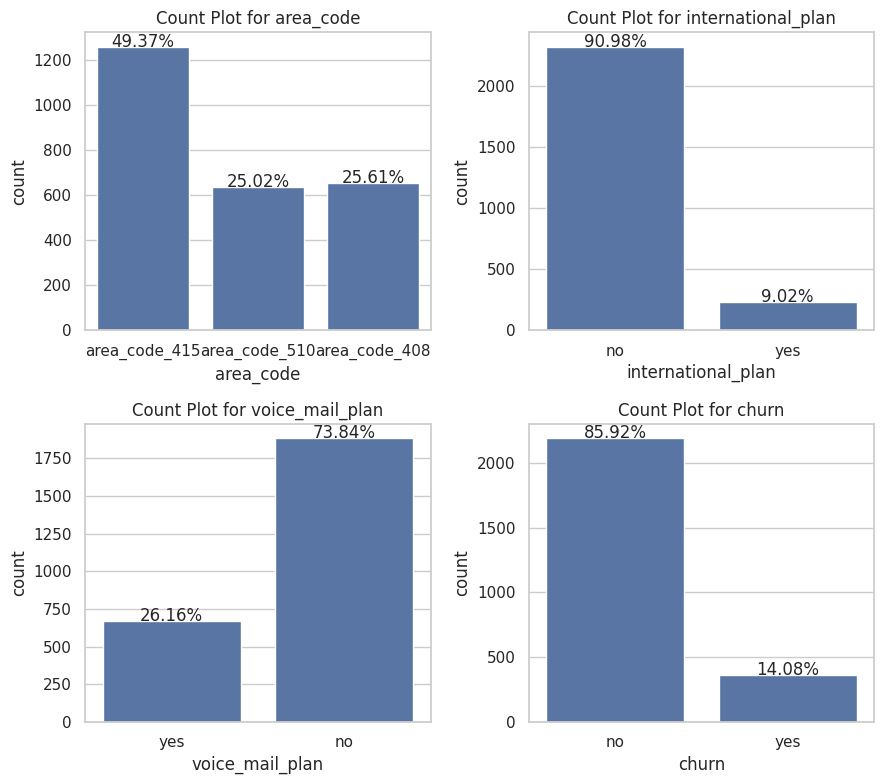

In [25]:
countplots(low_card)

Churn (i.e The target feature) is highly imbalanced. We might need to use precision/recall as our metric

In [26]:
def freq_table(col:pd.Series):
    percent = col.value_counts(normalize=True)
    counts = col.value_counts()
    freq_table = pd.DataFrame(data=[percent, counts]).T
    return freq_table

In [27]:
# High cardinality columns
freq_table(high_card.state)

,proportion,count
state,,
WV,0.036078,92.0
MN,0.027059,69.0
MA,0.024706,63.0
VA,0.024706,63.0
AL,0.023922,61.0
RI,0.022745,58.0
OR,0.022353,57.0
WY,0.022353,57.0
OH,0.021961,56.0


### Numeric

In [28]:
num_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1023,131,28,249.6,87,42.43,227.2,138,19.31,239.9,92,10.80,7.6,3,2.05,3
440,77,0,163.0,112,27.71,219.1,89,18.62,233.4,66,10.50,6.7,3,1.81,2
3560,82,0,191.9,95,32.62,116.7,105,9.92,202.6,113,9.12,8.2,5,2.21,0
3660,94,0,139.1,93,23.65,237.9,100,20.22,227.1,59,10.22,11.4,3,3.08,1
2337,130,0,115.6,129,19.65,167.8,104,14.26,141.8,124,6.38,12.6,9,3.40,1


In [29]:
# Get the unique values in num_df
unique_values(num_df, max_colwidth=150)

,Total,Uniques,Values
number_customer_service_calls,2550,10,"[[3, 2, 0, 1, 5, 4, 7, 6, 8, 9]]"
total_intl_calls,2550,21,"[[3, 5, 9, 4, 2, 7, 6, 1, 8, 0, 15, 10, 11, 13, 12, 14, 18, 16, 17, 19, 20]]"
number_vmail_messages,2550,44,"[[28, 0, 38, 22, 17, 31, 20, 32, 39, 34, 27, 21, 33, 36, 37, 41, 29, 15, 24, 26, 40, 25, 30, 18, 10, 16, 23, 48, 12, 35, 8, 45, 42, 19, 43, 13, 46..."
total_day_calls,2550,115,"[[87, 112, 95, 93, 129, 124, 88, 142, 119, 141, 82, 55, 107, 108, 92, 126, 130, 101, 94, 110, 127, 84, 104, 72, 138, 78, 123, 134, 128, 63, 120, 1..."
total_eve_calls,2550,118,"[[138, 89, 105, 100, 104, 116, 103, 111, 126, 101, 91, 95, 109, 118, 99, 98, 93, 102, 149, 68, 148, 107, 112, 82, 114, 85, 117, 97, 88, 129, 80, 9..."
total_night_calls,2550,119,"[[92, 66, 113, 59, 124, 73, 106, 85, 70, 88, 109, 93, 83, 55, 136, 141, 110, 75, 102, 138, 105, 94, 122, 100, 145, 71, 134, 78, 58, 117, 104, 137,..."
total_intl_minutes,2550,157,"[[7.6, 6.7, 8.2, 11.4, 12.6, 12.8, 12.4, 11.3, 9.7, 12.9, 8.3, 12.2, 7.7, 7.3, 10.6, 14.2, 10.3, 9.9, 9.6, 7.9, 9.1, 8.7, 6.6, 13.0, 9.0, 6.3, 10...."
total_intl_charge,2550,157,"[[2.05, 1.81, 2.21, 3.08, 3.4, 3.46, 3.35, 3.05, 2.62, 3.48, 2.24, 3.29, 2.08, 1.97, 2.86, 3.83, 2.78, 2.67, 2.59, 2.13, 2.46, 2.35, 1.78, 3.51, 2..."
account_length,2550,208,"[[131, 77, 82, 94, 130, 116, 80, 115, 74, 133, 100, 113, 79, 75, 151, 98, 63, 181, 70, 117, 118, 85, 81, 24, 127, 114, 152, 192, 112, 164, 55, 103..."
total_night_charge,2550,867,"[[10.8, 10.5, 9.12, 10.22, 6.38, 4.77, 8.33, 14.12, 9.77, 9.66, 10.32, 6.47, 6.66, 10.71, 9.18, 8.81, 9.98, 10.46, 11.81, 11.37, 6.69, 9.58, 15.71..."


Data description
+ account_length, numerical. Number of months the customer has been with the current telco provider
+ area_code, string="area_code_AAA" where AAA = 3 digit area code.
+ number_vmail_messages, numerical. Number of voice-mail messages.
+ total_day_minutes, numerical. Total minutes of day calls.
+ total_day_calls, numerical. Total number of day calls.
+ total_day_charge, numerical. Total charge of day calls.
+ total_eve_minutes, numerical. Total minutes of evening calls.
+ total_eve_calls, numerical. Total number of evening calls.
+ total_eve_charge, numerical. Total charge of evening calls.
+ total_night_minutes, numerical. Total minutes of night calls.
+ total_night_calls, numerical. Total number of night calls.
+ total_night_charge, numerical. Total charge of night calls.
+ total_intl_minutes, numerical. Total minutes of international calls.
+ total_intl_calls, numerical. Total number of international calls.
+ total_intl_charge, numerical. Total charge of international calls
+ number_customer_service_calls, numerical. Number of calls to customer service

In [30]:
def box_hist(data, figsize=(12, 6)):
    numeric_columns = data.select_dtypes(include='number').columns
    num_cols = len(numeric_columns)
    num_rows = num_cols

    fig, axes = plt.subplots(num_rows, 2, figsize=figsize)
    
    for i, column in enumerate(numeric_columns):
        ax_box = axes[i, 0]
        ax_hist = axes[i, 1]

        sns.histplot(data=data, x=column, bins="auto", ax=ax_box, kde=True)
        sns.boxplot(data=data, x=column, ax=ax_hist)

        ax_box.set_xlabel(column)
        ax_hist.set_xlabel(column)

    plt.tight_layout()
    plt.show()

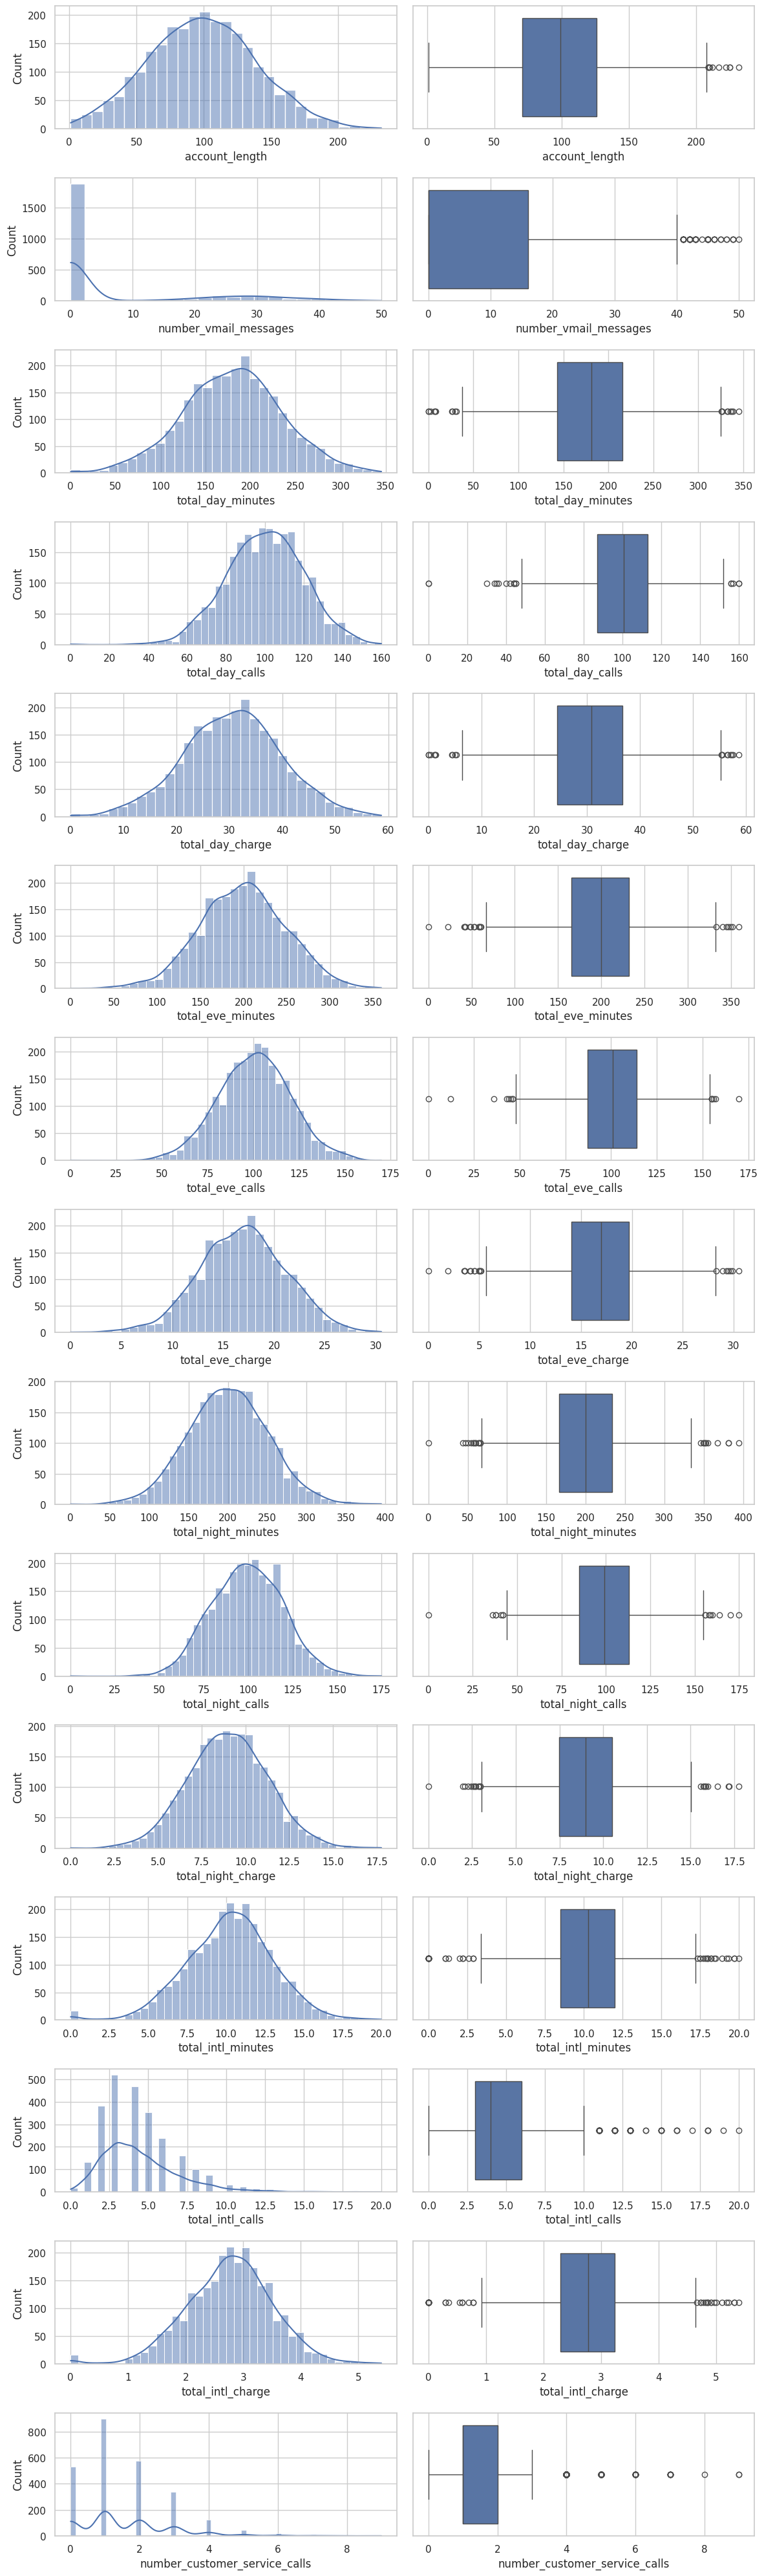

In [31]:
# Visualize the numeric columns
box_hist(num_df, figsize=(12, 40))

Number of voicemail is expected to be skewed. Nothing unusual

We expect the number of customer service calls to be left skewed too

In [32]:
# num_df.total_intl_charge.value_counts()

## Multivariate analysis

In [33]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1023,KS,131,area_code_415,no,yes,28,249.6,87,42.43,227.2,138,19.31,239.9,92,10.80,7.6,3,2.05,3,no
440,AL,77,area_code_415,no,no,0,163.0,112,27.71,219.1,89,18.62,233.4,66,10.50,6.7,3,1.81,2,no
3560,UT,82,area_code_510,no,no,0,191.9,95,32.62,116.7,105,9.92,202.6,113,9.12,8.2,5,2.21,0,no
3660,KY,94,area_code_408,no,no,0,139.1,93,23.65,237.9,100,20.22,227.1,59,10.22,11.4,3,3.08,1,no
2337,IN,130,area_code_408,no,no,0,115.6,129,19.65,167.8,104,14.26,141.8,124,6.38,12.6,9,3.40,1,no


<Axes: xlabel='total_intl_minutes', ylabel='churn'>

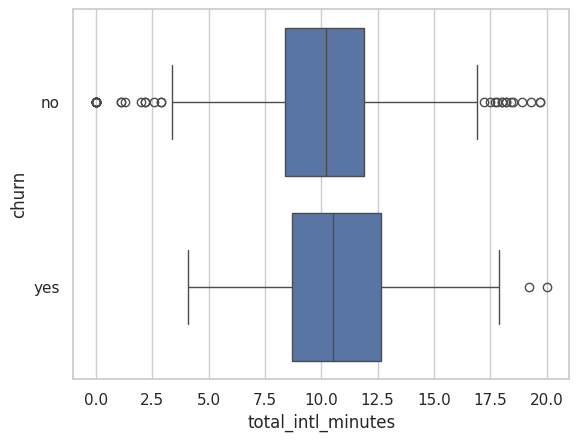

In [34]:
# Churn vs total international minutes of call
sns.boxplot(train_df, y='churn', x='total_intl_minutes')

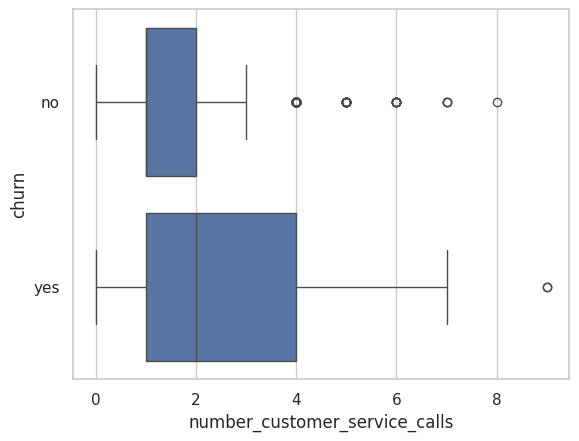

In [35]:
# Churn vs number of customer service calls
sns.boxplot(train_df, y='churn', x='number_customer_service_calls');

Thres a fair relationship here. It seems some of the customers who churn have a higher number of people who called customer service
The people who stayed probably have their issues solved

In [36]:
# Supplement the above diagram with a table
cvc = pd.crosstab(index=train.number_customer_service_calls, columns=train.churn)
cvc

churn,no,yes
number_customer_service_calls,,
0,631,79
1,1086,131
2,681,77
3,393,54
4,95,75
5,23,37
6,8,15
7,4,7
8,1,1


If you call the customer service 5 times or above, you are more likely to churn

In [37]:
# State vs churn
pd.crosstab(index=train.state, columns=train.churn)

churn,no,yes
state,,
AK,50,3
AL,70,9
AR,53,11
AZ,57,6
CA,17,8
CO,53,7
CT,57,11
DC,51,7
DE,52,10


There's alot of states in the datase

### Multicolinearity

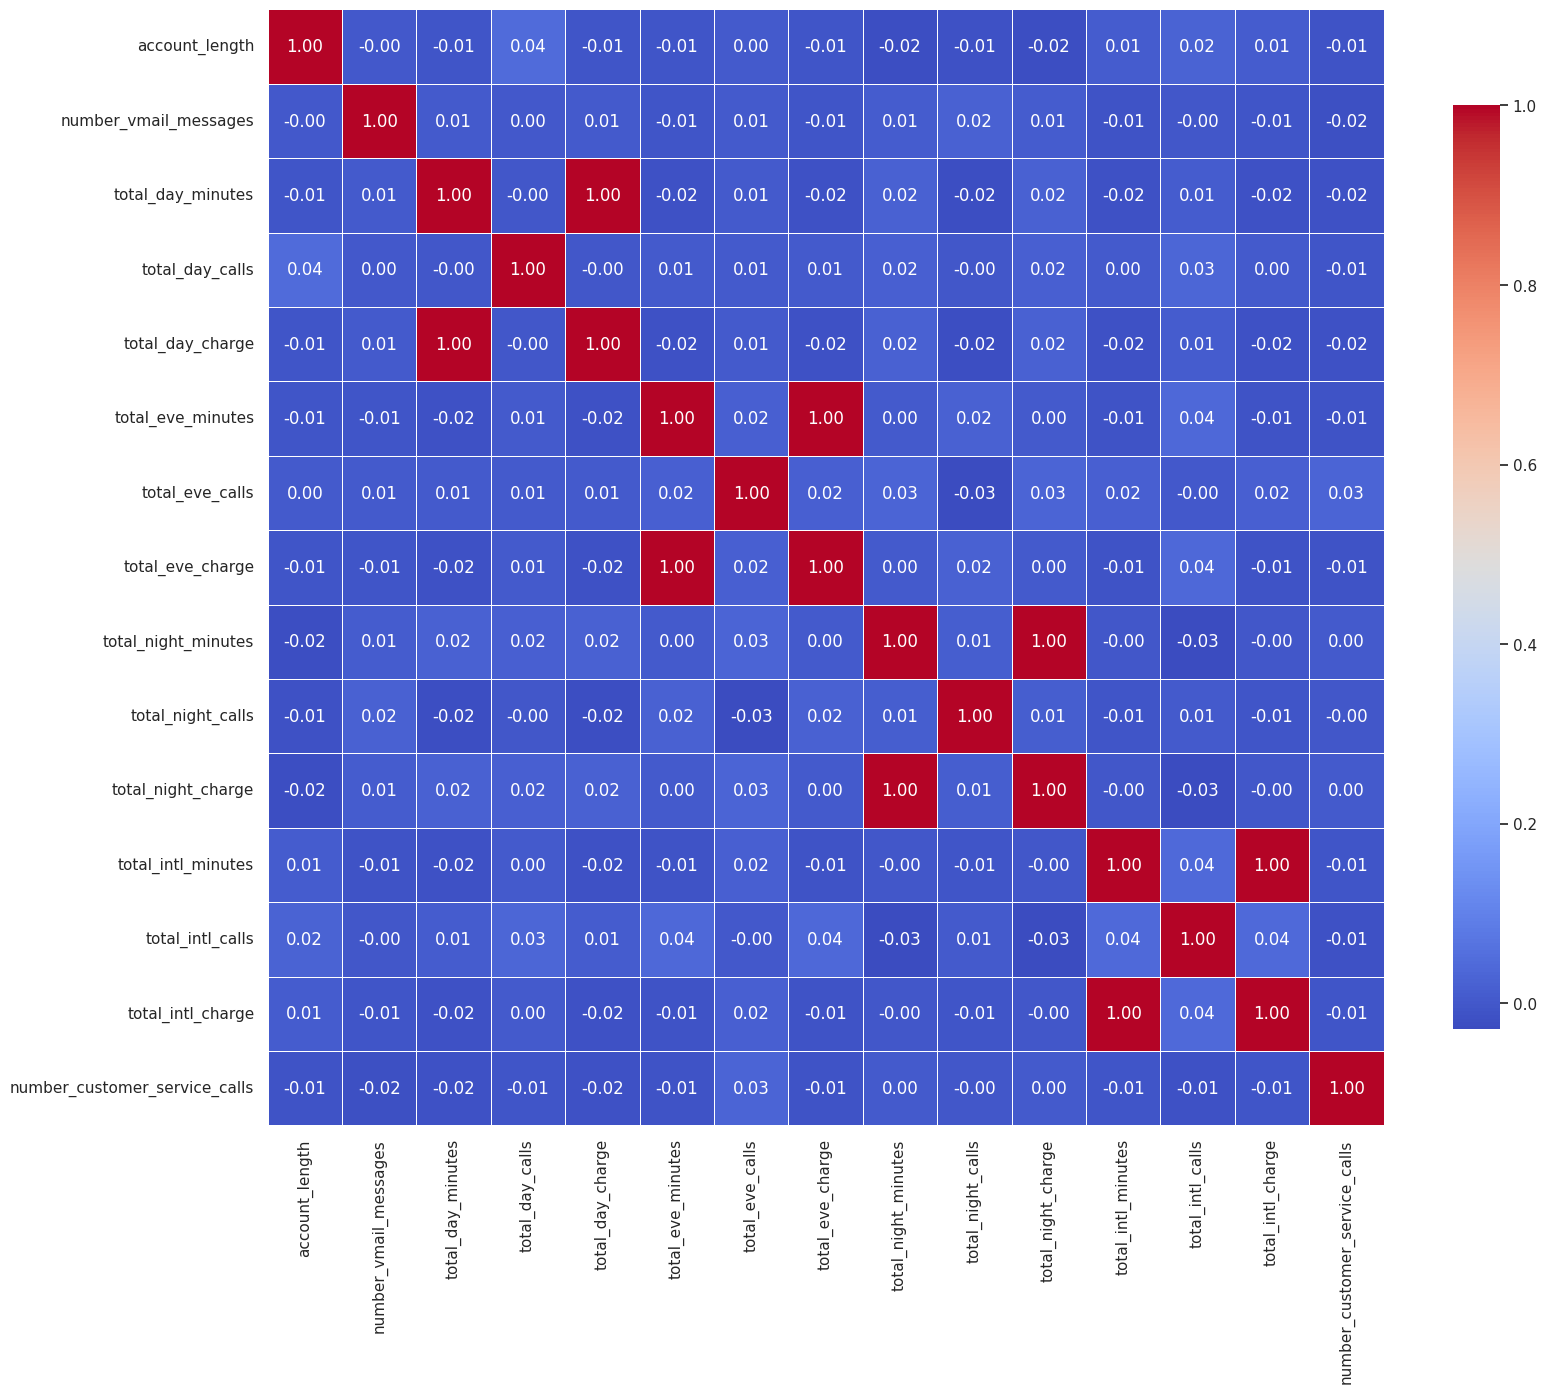

In [38]:
# correlation matrix
corr_matrix = num_df.corr()

# heatmap with rotated labels
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            linewidths=.5, cbar_kws={"shrink": 0.8}, square=True)

# Rotate x labels
# plt.xticks(rotation=35)

# Rotate ylabels
# plt.yticks(rotation=25)
plt.show();

In [39]:
# Test multicolinearity
def find_multicollinear_columns(df, threshold=0.7):
    # Compute correlation matrix
    corr_matrix = df.corr().abs()

    # Find pairs of multicollinear columns
    multicollinear_columns = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_columns.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    # View multicollinear columns
    if multicollinear_columns:
        print("Multicollinear Columns:")
        for pair in multicollinear_columns:
            print(f"{pair[0]} - {pair[1]}: {pair[2]}")

        return [(pair[0], pair[1]) for pair in multicollinear_columns]  # Return multicollinear column names
    else:
        print("No multicollinear columns found.")

In [40]:
# Find multicolinear columns
find_multicollinear_columns(num_df)

Multicollinear Columns:
total_day_minutes - total_day_charge: 0.9999999525898803
total_eve_minutes - total_eve_charge: 0.9999997652255918
total_night_minutes - total_night_charge: 0.9999991917880378
total_intl_minutes - total_intl_charge: 0.9999929820596727


[('total_day_minutes', 'total_day_charge'),
 ('total_eve_minutes', 'total_eve_charge'),
 ('total_night_minutes', 'total_night_charge'),
 ('total_intl_minutes', 'total_intl_charge')]

In [41]:
# Drop multicolinear columns
num_df = num_df.drop(
    columns=['total_day_charge', 'total_eve_charge', 
             'total_night_charge', 'total_intl_charge']
)

In [42]:
find_multicollinear_columns(num_df)

No multicollinear columns found.


## Wrangle function

Defne a wrangle function to perform all the transformation above on the dataset  
The output is a prepared train, validation and test set

In [43]:
# convert yes to 1 and no to 0 in churn. i.e the target
yn_mapping = {'yes': 1, 'no':0}

train['churn'] = train['churn'].map(yn_mapping)

In [44]:
train.churn[:5]

3835    0
1518    1
1704    0
3808    0
1448    0
Name: churn, dtype: int64

In [45]:
# Create a wrangle function to get the train, test and validation dataset
def wrangle():
    # Get train and test
    data = pd.read_csv('data/train.csv')

    # Split the data into train, validation and test set
    train, test_df = train_test_split(data, test_size=0.20, stratify=data['churn'], random_state=42)
    train_df, val_df = train_test_split(train, test_size=0.25, stratify=train['churn'], random_state=42)

    # multicolinear cols
    mcs = ['total_day_charge', 'total_eve_charge',
           'total_night_charge', 'total_intl_charge']

    # Drop multicolinear columns
    train_df = train_df.drop(columns=mcs)
    val_df = val_df.drop(columns=mcs)
    test_df = test_df.drop(columns=mcs)

    # convert yes to 1 and no to 0 in churn. i.e the target
    yn_mapping = {'yes': 1, 'no':0}

    # map churn to the train and val set
    train_df['churn'] = train_df['churn'].map(yn_mapping)
    val_df['churn'] = val_df['churn'].map(yn_mapping)
    test_df['churn'] = test_df['churn'].map(yn_mapping)

    return  train_df, val_df, test_df

In [46]:
tr, v, ts = wrangle()
tr.shape, v.shape, ts.shape

((2550, 16), (850, 16), (850, 16))

this function will be copied to wrangle.pyin order to enable importing